# 因子分析準備

ここからは、スマホ利用アンケートの解答項目を２つのタイプに分けて捉えることにします。１つ目は、本人の行動にかかわる質問項目です。 例えば、「悪口等のメール・メッセージ送った」、「掲示板で自分や他人の情報書き込んだ」などの質問です。 ２つ目は、周囲の環境にかかわる質問項目です。例えば、「メール・メッセージを送る相手の制限」、 「（スマホのことについて）兄弟・姉妹から教えてもらった」などの質問が挙げられます。 この２つの性質を、２つの因子と捉え、因子分析を実施します。 データは、都道府県ごとのレコードになっていますので、最終的には都道府県ごとの因子得点を算出することを目的としています。

最終的には、因子を２として因子分析にかける予定ですが、
因子分析に入る前に、因子数２とした場合の固有値と寄与率を確認しておきます。

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#matplotlibをjupyter上で使えるようにする
%matplotlib inline

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


df1 = pd.read_csv("03input_4カ年結合_欠損など修正後.csv", header=None, encoding="utf-8")

#カラム名の修正
df1_col = df1.iloc[0]
df1.columns = df1_col
df1=df1.drop([0])

#都道府県列を削除し、値を数値化
df1 = df1.drop("都道府県", axis=1)
df1 = df1.astype(float)
df1

,01総数,01スマートフォン,01格安スマートフォン,01機能限定・子供向けスマートフォン,01契約切れスマートフォン,01携帯電話,01機能限定電話・子ども向け携帯電話,01ノートパソコン,01デスクトップパソコン,01タブレット,...,92女子_37,92高校生男子,92女子_38,92その他,93総数,93１人以上いる,93いない,暴力件数,いじめ件数,不登校件数
1,151.0,54.3,2.0,3.3,6.6,2.6,9.3,14.6,11.9,37.7,...,20.5,13.9,9.9,0.7,151.0,53.0,47.0,1.5,24.5,12.5
2,26.0,38.5,7.7,0.0,3.8,0.0,7.7,30.8,11.5,30.8,...,15.4,23.1,11.5,3.8,26.0,53.8,46.2,7.4,53.9,11.6
3,49.0,44.9,6.1,2.0,8.2,2.0,4.1,10.2,6.1,24.5,...,10.2,16.3,16.3,0.0,49.0,51.0,49.0,4.2,53.6,12.6
4,75.0,45.3,1.3,4.0,1.3,2.7,5.3,18.7,2.7,26.7,...,18.7,14.7,14.7,1.3,75.0,49.3,50.7,6.0,79.5,20.9
5,28.0,39.3,0.0,0.0,3.6,0.0,0.0,3.6,0.0,17.9,...,21.4,17.9,10.7,10.7,28.0,57.1,42.9,1.5,32.4,10.5
6,48.0,52.1,0.0,4.2,2.1,6.3,2.1,10.4,0.0,22.9,...,16.7,18.8,22.9,0.0,48.0,50.0,50.0,1.0,54.1,13.0
7,42.0,38.1,0.0,9.5,2.4,2.4,11.9,7.1,2.4,21.4,...,21.4,4.8,14.3,0.0,42.0,45.2,54.8,2.5,24.3,11.6
8,89.0,65.2,2.2,4.5,1.1,2.2,11.2,23.6,5.6,32.6,...,16.9,12.4,11.2,0.0,89.0,52.8,47.2,5.8,60.4,11.9
9,74.0,54.1,1.4,4.1,4.1,1.4,5.4,10.8,4.1,24.3,...,16.2,20.3,10.8,0.0,74.0,50.0,50.0,5.5,19.2,16.7
10,55.0,52.7,3.6,1.8,3.6,5.5,10.9,14.5,5.5,12.7,...,14.5,10.9,20.0,0.0,55.0,47.3,52.7,1.5,15.7,14.9


分析には、多重共線性、P値、因子負荷量を考慮して、21項目に絞り、さらに２因子の影響があいまいな7項目を削除しました。最終的には14項目を因子分析に使います。
（くわしくは、https://drive.google.com/file/d/1LopFipiK4KCLgUwyro3Z7UCrqoBIY2WM/view のシート19、28、33、34を参照ください）

In [4]:
#利用するカラムのリストを読み込み
df2 = pd.read_csv("04input_分析使用カラム_因子分析_多項目_因子負荷量精査後.csv", header=None, encoding="utf-8")

df2 = df2.iloc[:,0]#serisに変換

list1 = df2.values.tolist()

#対象の項目だけを抽出したＤＦ
df_setsumei = df1[list1]
df_setsumei = df_setsumei.astype(float)#値を数値化

df_setsumei

,85悪口等のメール・メッセージ送った,85掲示板で自分や他人の情報書き込んだ,85親に話しにくいサイトを見た,85ゲームなどでお金を使いすぎた,85差別内容掲載サイトにアクセスする,85ネットで知り合った人とメール等した,85ネットで知り合った異性と会った,86利用する時間を決めている,86メール・メッセージを送る相手の制限,86送信・投稿内容を決めている,86料金上限や課金方法を決めている,87親（保護者）から教えてもらった,87兄弟・姉妹から教えてもらった,87機器の購入時に販売員より説明された
1,1.5,2.2,0.0,1.5,0.7,8.8,0.7,32.1,5.1,14.6,28.5,45.0,3.3,4.6
2,0.0,5.6,5.6,5.6,5.6,22.2,0.0,16.7,16.7,5.6,27.8,38.5,3.8,7.7
3,0.0,0.0,2.4,0.0,0.0,0.0,0.0,33.3,11.9,2.4,2.4,32.7,0.0,2.0
4,0.0,0.0,0.0,1.8,0.0,1.8,0.0,39.3,7.1,8.9,21.4,38.7,2.7,6.7
5,0.0,5.0,0.0,5.0,0.0,15.0,0.0,45.0,10.0,10.0,20.0,64.3,3.6,7.1
6,2.2,2.2,2.2,2.2,0.0,8.7,0.0,26.1,10.9,8.7,17.4,35.4,4.2,6.3
7,0.0,3.6,0.0,3.6,0.0,32.1,0.0,25.0,14.3,7.1,32.1,31.0,4.8,4.8
8,1.3,2.5,2.5,2.5,0.0,11.3,0.0,36.3,10.0,21.3,32.5,43.8,5.6,4.5
9,1.8,1.8,1.8,3.5,1.8,14.0,0.0,28.1,14.0,7.0,28.1,37.8,1.4,9.5
10,0.0,6.8,6.8,2.3,4.5,18.2,2.3,31.8,15.9,22.7,25.0,40.0,5.5,10.9


In [17]:
df_setsumei.to_csv("04-1output_因子分析データセット.csv")

↓ここから、固有値と寄与率を求めます

In [6]:
df = df_setsumei.T#転置
df

,1,2,3,4,5,6,7,8,9,10,...,176,177,178,179,180,181,182,183,184,185
0,,,,,,,,,,,,,,,,,,,,,
85悪口等のメール・メッセージ送った,1.5,0.0,0.0,0.0,0.0,2.2,0.0,1.3,1.8,0.0,...,0.0,11.1,0.0,0.0,0.0,2.9,0.0,0.0,0.0,5.9
85掲示板で自分や他人の情報書き込んだ,2.2,5.6,0.0,0.0,5.0,2.2,3.6,2.5,1.8,6.8,...,4.8,0.0,0.0,6.7,0.0,0.0,0.0,3.6,0.0,2.9
85親に話しにくいサイトを見た,0.0,5.6,2.4,0.0,0.0,2.2,0.0,2.5,1.8,6.8,...,0.0,0.0,0.0,0.0,0.0,0.0,6.7,3.6,0.0,0.0
85ゲームなどでお金を使いすぎた,1.5,5.6,0.0,1.8,5.0,2.2,3.6,2.5,3.5,2.3,...,4.8,11.1,0.0,0.0,0.0,5.9,0.0,3.6,0.0,5.9
85差別内容掲載サイトにアクセスする,0.7,5.6,0.0,0.0,0.0,0.0,0.0,0.0,1.8,4.5,...,0.0,11.1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
85ネットで知り合った人とメール等した,8.8,22.2,0.0,1.8,15.0,8.7,32.1,11.3,14.0,18.2,...,4.8,55.6,7.7,6.7,0.0,5.9,6.7,10.7,13.6,11.8
85ネットで知り合った異性と会った,0.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.3,...,0.0,0.0,1.0,0.0,0.0,2.9,0.0,0.0,0.0,2.9
86利用する時間を決めている,32.1,16.7,33.3,39.3,45.0,26.1,25.0,36.3,28.1,31.8,...,23.8,0.0,27.9,40.0,32.0,26.5,40.0,32.1,40.9,17.6
86メール・メッセージを送る相手の制限,5.1,16.7,11.9,7.1,10.0,10.9,14.3,10.0,14.0,15.9,...,4.8,11.1,4.8,6.7,12.0,0.0,6.7,7.1,0.0,5.9


In [7]:
array1 = df.values
array1

array([[ 1.5,  0. ,  0. , ...,  0. ,  0. ,  5.9],
       [ 2.2,  5.6,  0. , ...,  3.6,  0. ,  2.9],
       [ 0. ,  5.6,  2.4, ...,  3.6,  0. ,  0. ],
       ...,
       [45. , 38.5, 32.7, ..., 30. , 33.3, 40.4],
       [ 3.3,  3.8,  0. , ...,  7.5,  3. ,  2.1],
       [ 4.6,  7.7,  2. , ...,  5. ,  0. ,  4.3]])

In [8]:
#データを文字列→数値化
array_flt = []

for i in range(14):
    array2 = [float(s) for s in array1[i]]
    array_flt.append(array2)

print(array_flt)

[[1.5, 0.0, 0.0, 0.0, 0.0, 2.2, 0.0, 1.3, 1.8, 0.0, 0.0, 0.8, 0.4, 1.3, 0.0, 0.0, 3.1, 0.0, 3.7, 3.9, 0.0, 0.0, 1.0, 1.4, 0.0, 3.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.2, 0.0, 0.0, 0.0, 2.4, 0.0, 3.6, 0.0, 1.5, 10.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.1, 0.8, 0.0, 0.0, 0.7, 2.1, 0.0, 0.0, 5.6, 5.0, 4.3, 0.0, 1.2, 0.0, 0.0, 0.0, 0.0, 1.4, 0.7, 0.0, 0.0, 0.0, 4.3, 1.9, 1.9, 3.3, 0.0, 0.0, 0.0, 1.1, 0.0, 0.0, 0.0, 0.0, 0.0, 3.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.1, 1.0, 1.0, 2.7, 0.0, 0.0, 0.0, 0.0, 3.2, 0.0, 1.7, 0.0, 0.6, 0.0, 0.0, 2.6, 4.3, 1.1, 0.0, 0.0, 4.8, 0.0, 3.7, 2.6, 0.0, 3.4, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 4.3, 6.8, 0.0, 0.0, 0.0, 1.5, 0.0, 0.0, 0.0, 0.0, 2.1, 6.7, 0.8, 2.1, 0.5, 1.8, 0.0, 2.1, 4.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 2.1, 0.0, 0.0, 0.5, 3.7, 4.0, 0.0, 0.0, 7.1, 0.0, 1.6, 0.0, 0.0, 0.0, 0.0, 11.1, 0.0, 0.0, 0.0, 2.9, 0.0, 0.0, 0.0, 5.9], [2.2, 5.6, 0.0, 0.0, 5.0, 2.2, 3.6, 2.5, 1.8, 6.8, 2.3, 3.4, 4.4, 3.8,

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sympy import Matrix, init_printing
init_printing()

In [10]:
#分散共分散行列

cov = np.cov(array_flt)
Matrix(cov)

⎡ 3.49983078730905     0.582991186839013   0.552236486486487    1.323544065804
⎢                                                                             
⎢ 0.582991186839013    8.44008989424207     0.77862044653349   0.4426048766157
⎢                                                                             
⎢ 0.552236486486487    0.77862044653349      7.267633960047     1.637430376028
⎢                                                                             
⎢ 1.32354406580494     0.442604876615746    1.6374303760282     6.040203877790
⎢                                                                             
⎢ 0.843343419506463    0.570371034077556   0.592842831962397    1.151275264394
⎢                                                                             
⎢ 6.10635693301998     2.83831580493537     4.19435017626322    6.237138366627
⎢                                                                             
⎢ 0.98014571092832     1.00243331374853     1.104624

In [11]:
# 固有値, 固有ベクトル
ev, evec = np.linalg.eig(cov)
evec = evec.T

#固有ベクトル
#Matrix(evec)

#固有値
Matrix(ev)


⎡162.445151196148⎤
⎢                ⎥
⎢96.6292008298856⎥
⎢                ⎥
⎢60.5682318637405⎥
⎢                ⎥
⎢40.6937112483228⎥
⎢                ⎥
⎢32.8801177433387⎥
⎢                ⎥
⎢19.8506278692993⎥
⎢                ⎥
⎢1.50811798582333⎥
⎢                ⎥
⎢1.43716714092642⎥
⎢                ⎥
⎢2.86860426221176⎥
⎢                ⎥
⎢4.73235638159935⎥
⎢                ⎥
⎢11.7452706898534⎥
⎢                ⎥
⎢6.60128939944877⎥
⎢                ⎥
⎢8.29360680941163⎥
⎢                ⎥
⎣9.10442143310435⎦

In [12]:
#降順で並び替え
list_ev = ev
list_ev = sorted(list_ev, reverse=True)
list_ev

In [13]:
# 寄与率
crate = ev / np.sum(ev)
Matrix(crate)

⎡ 0.353635281093401 ⎤
⎢                   ⎥
⎢ 0.210357122669953 ⎥
⎢                   ⎥
⎢ 0.131854127640912 ⎥
⎢                   ⎥
⎢0.0885882521581569 ⎥
⎢                   ⎥
⎢0.0715784349051436 ⎥
⎢                   ⎥
⎢0.0432138621236151 ⎥
⎢                   ⎥
⎢0.00328310031977916⎥
⎢                   ⎥
⎢0.00312864374293348⎥
⎢                   ⎥
⎢0.00624481350870285⎥
⎢                   ⎥
⎢0.0103021122324562 ⎥
⎢                   ⎥
⎢0.0255688893841411 ⎥
⎢                   ⎥
⎢0.0143706895229773 ⎥
⎢                   ⎥
⎢0.0180547831297409 ⎥
⎢                   ⎥
⎣0.0198198875680875 ⎦

In [14]:
#降順で並び替え
list_crate = crate
list_crate = sorted(list_crate, reverse=True)
list_crate

In [15]:
# 累積寄与率
crate_Accumulation = [list_crate[0]]

for i in range(13):
    crate_tmp = crate_Accumulation[i] + list_crate[i+1]
    crate_Accumulation.append(crate_tmp)

    
crate_Accumulation


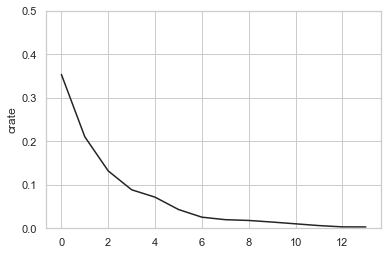

In [16]:
sns.set()
sns.set_style('whitegrid')
sns.set_palette('gray')

x = list(range(14))
y = list_crate

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(x, y)
ax.set_ylabel('crate')

ax.set_ylim(0, 0.5)
plt.show()

因子寄与率は、２因子で0.56なのであまり高くはありませんが、ある程度説明はつけられるので、２因子で進めます。